In [11]:
import pandas as pd 
import seaborn as sns 
import numpy as np

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.patches import Shadow
from matplotlib.lines import Line2D

# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
   # "pgf.texsystem": "pdflatex",
    'font.family': 'sans-serif',
   # 'font.size' : 25,
    'axes.titlesize' : 25,
    'axes.labelsize' : 25,
    'legend.fontsize' : 15,
    'xtick.labelsize' : 10,
    'ytick.labelsize' : 10,
   # 'text.usetex': True,
   # 'pgf.rcfonts': True,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
           # "pgf.texsystem": "pdflatex",
           # 'pgf.rcfonts': True,
            'font.family': 'sans-serif',
          # 'font.size' : 25,
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
           # 'text.usetex': True,
})
%matplotlib inline

In [12]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

# 1. Random split

In [13]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2')

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


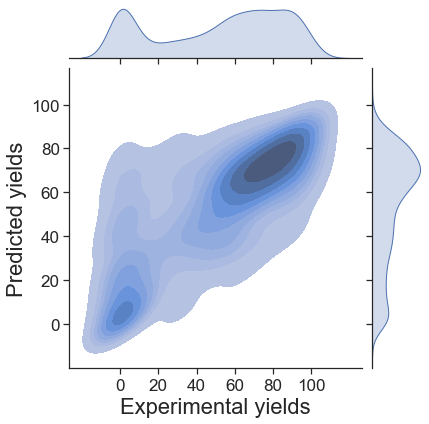

In [14]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
#h.ax_marg_x.set_facecolor("white")
#h.ax_marg_y.set_facecolor("white")

fig_path = 'images/random_split_fp_descriptors_test_size_0.2_full.png'
plt.savefig(fig_path)

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

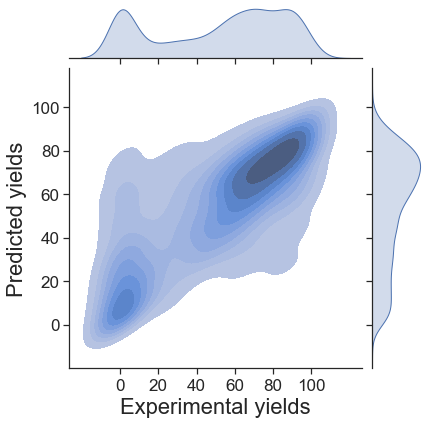

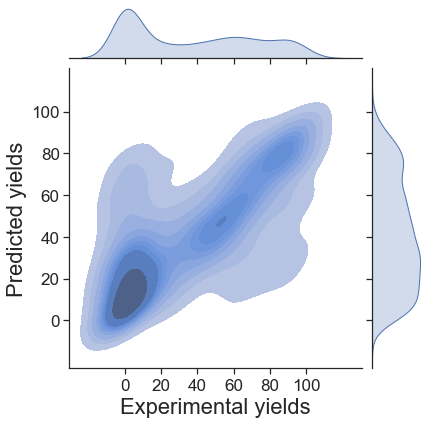

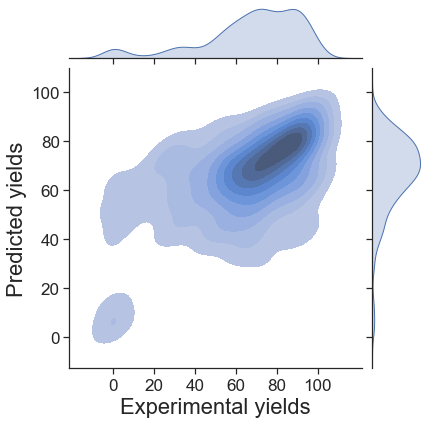

In [17]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_test_size_0.2_full.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

h = sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_scope.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

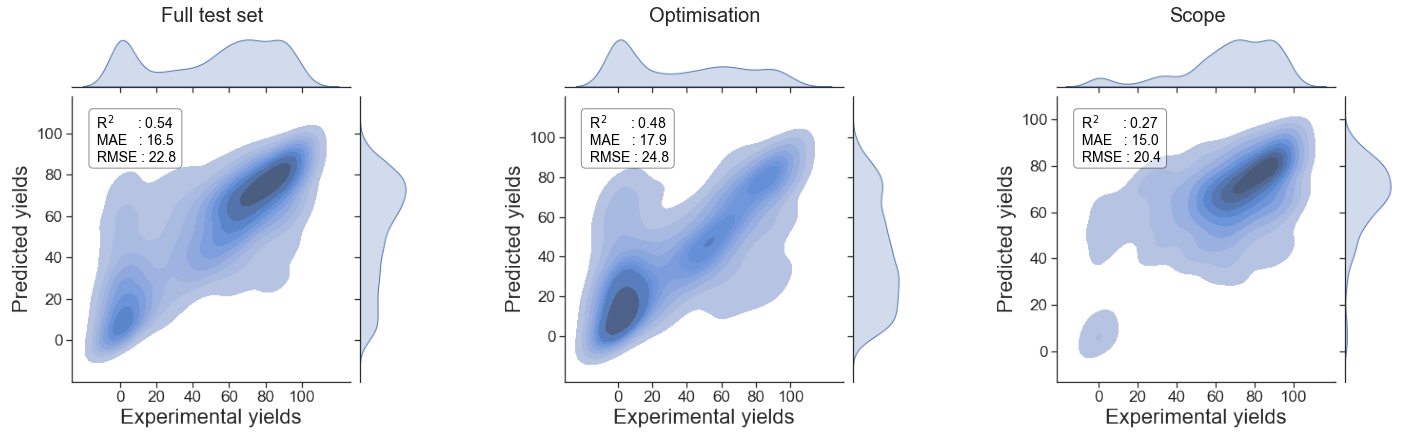

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R$^2$      : {:.2f} \n MAE   : {:.1f} \n RMSE : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k" ))

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


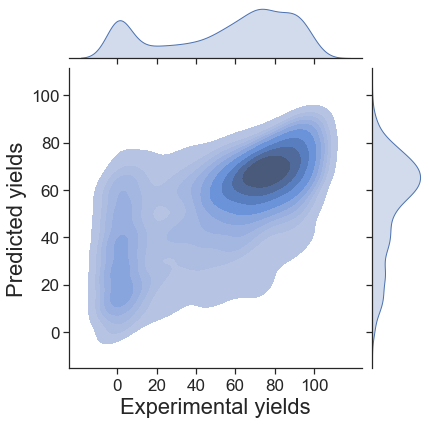

In [19]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')

In [20]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


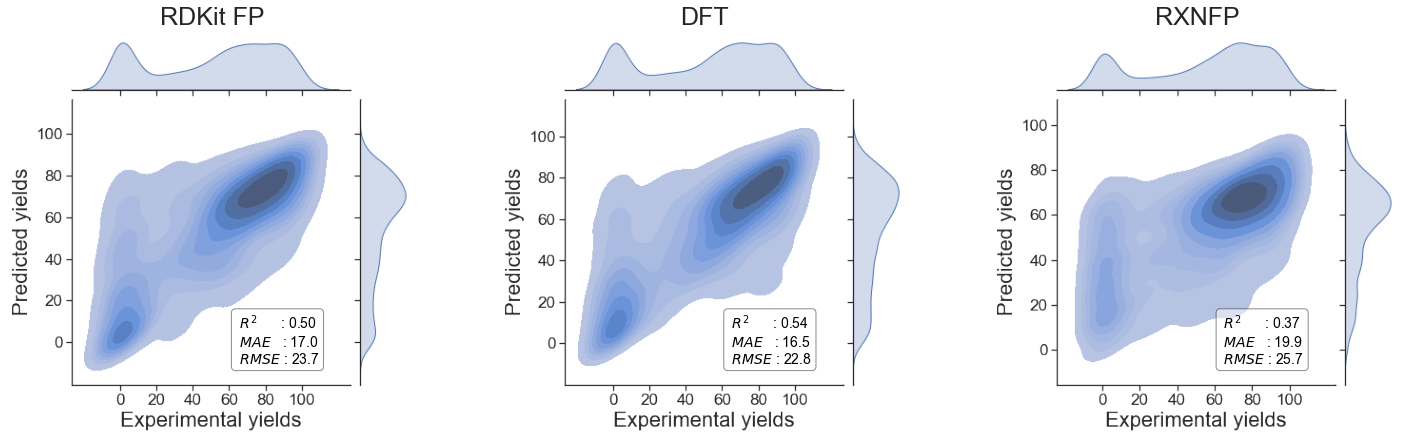

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 2. Substrate split

In [22]:
df_1 = pd.read_csv('results/substrate_split_fp_descriptors')
df_2 = pd.read_csv('results/substrate_split_dft_descriptors')
df_3 = pd.read_csv('results/substrate_split_rxnfp_descriptors')

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


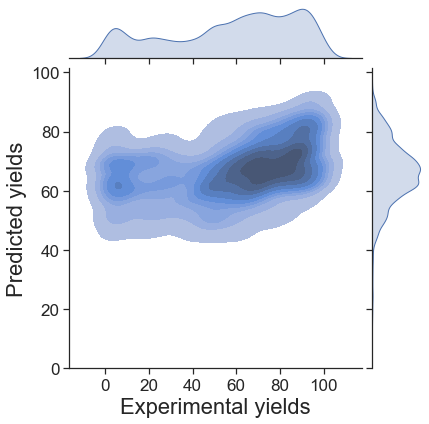

In [23]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_full.png')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

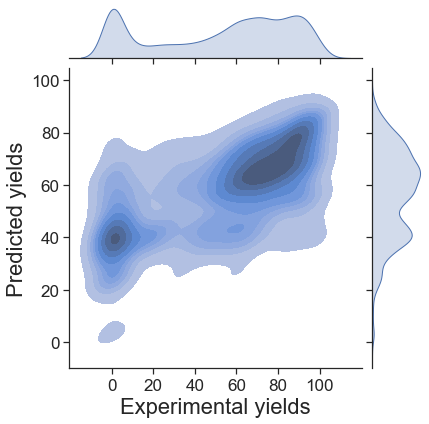

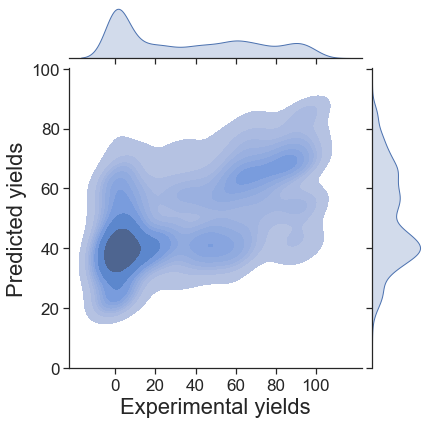

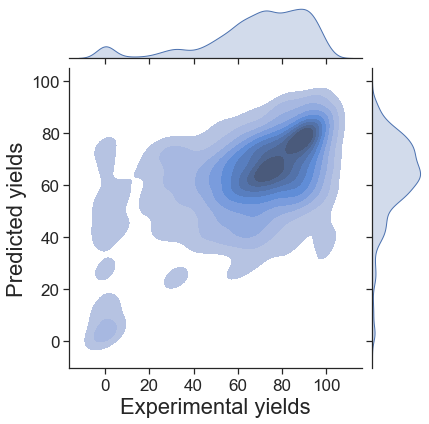

In [24]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_full.png')
fig_paths.append('images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_scope.png')
fig_paths.append('images/substrate_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

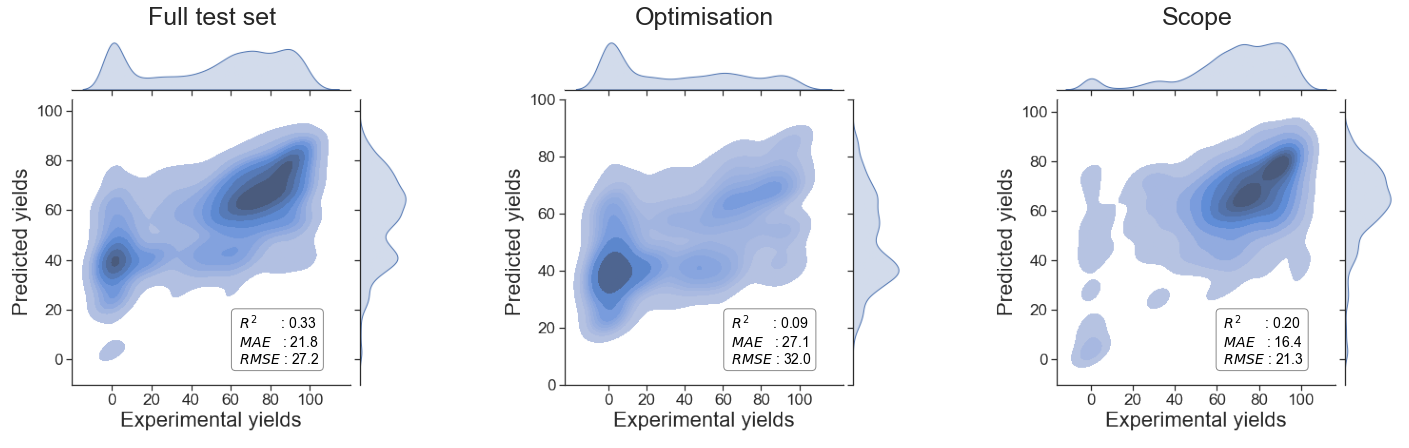

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

0.7171650157285323


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Real $\\leq$ 50%'), Text(0, 1.5, ' Real > 50%')])

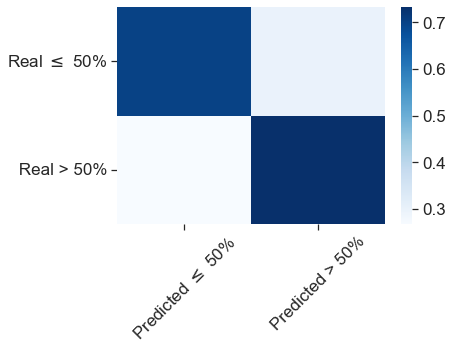

In [27]:
indices = np.where(df_2['Origin'] == "optimisation")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]


predictions = df_2_scope["Global model"]>50
cm = confusion_matrix(1 * df_2_scope["Yields"]>50, predictions, normalize="true")

fpr, tpr, thresholds = metrics.roc_curve(1 * df_2_scope["Yields"]>50, predictions)
print(metrics.auc(fpr, tpr))

df = pd.DataFrame(data=cm, index=["Real $\leq$ 50%", " Real > 50%"], columns=["Predicted $\leq$ 50%", "Predicted > 50%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


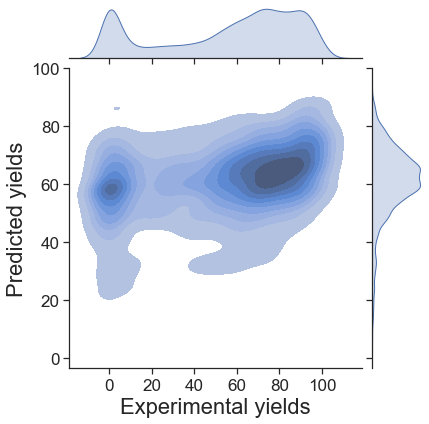

In [28]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_rxnfp_descriptors_full.png')

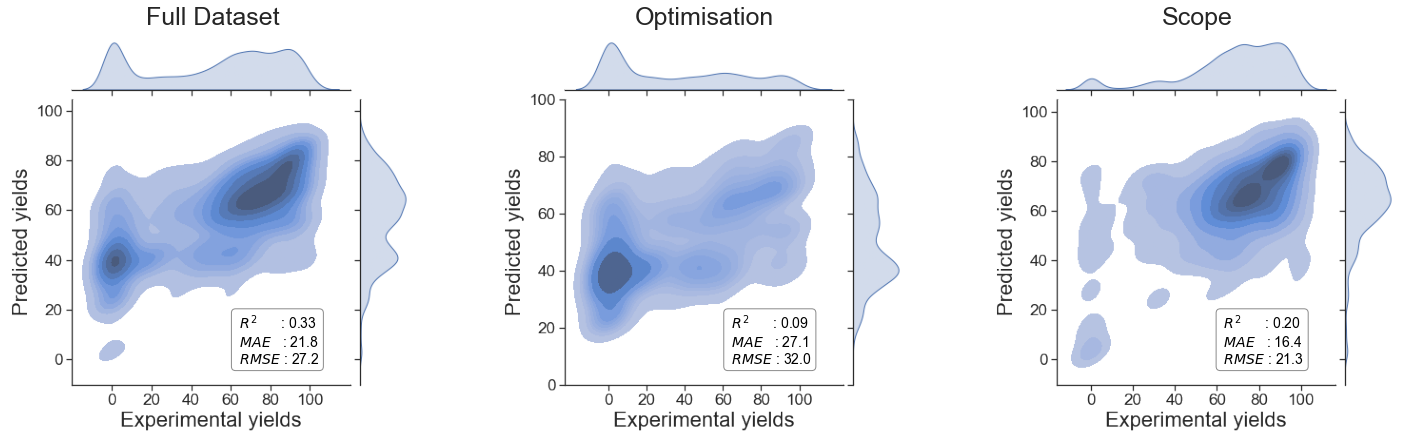

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["Full Dataset", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})

    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 3. DOI split

In [32]:
df_1 = pd.read_csv('results/doi_split_fp_descriptors')
df_2 = pd.read_csv('results/doi_split_dft_descriptors')
df_3 = pd.read_csv('results/doi_split_rxnfp_descriptors')

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


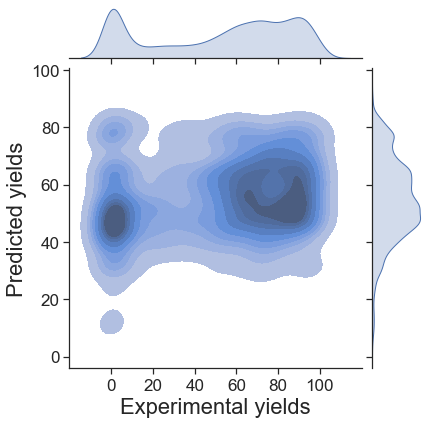

In [33]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_fp_descriptors_full.png')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

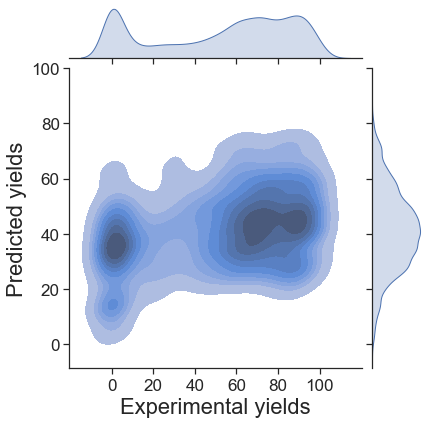

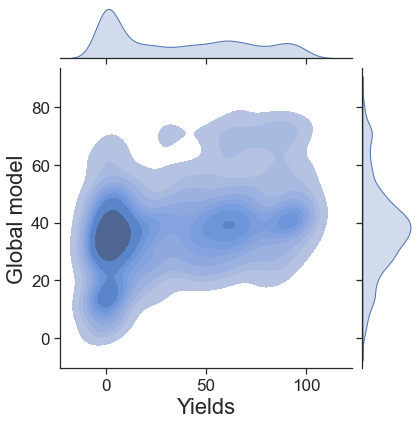

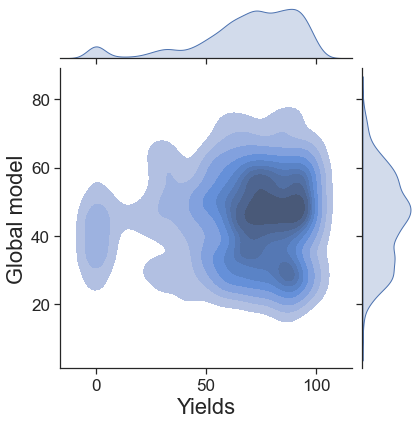

In [34]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_dft_descriptors_full.png')
fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/doi_split_dft_descriptors_optimisation.png')
fig_paths.append('images/doi_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/doi_split_dft_descriptors_scope.png')
fig_paths.append('images/doi_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

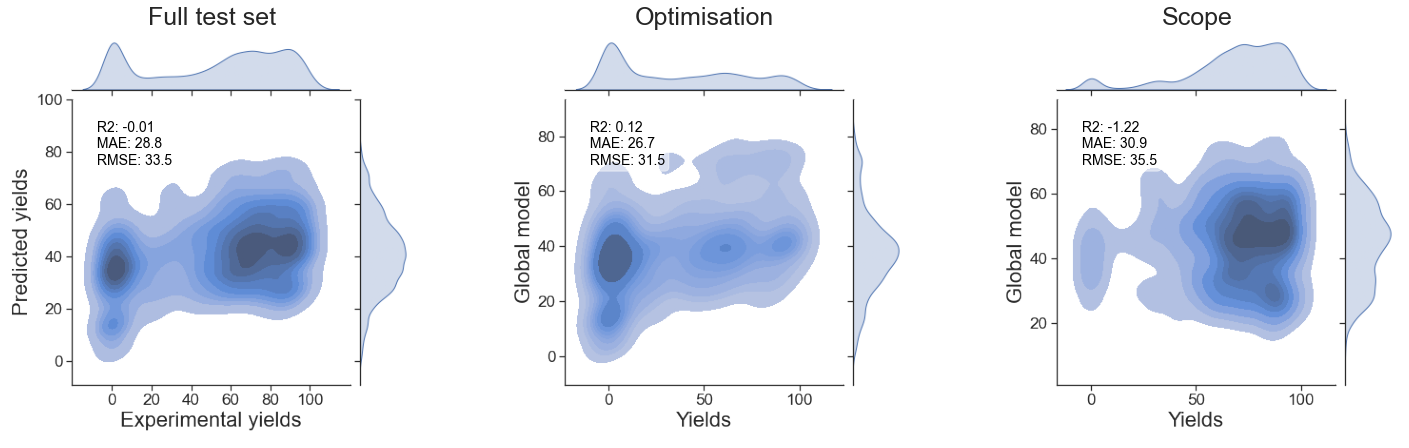

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


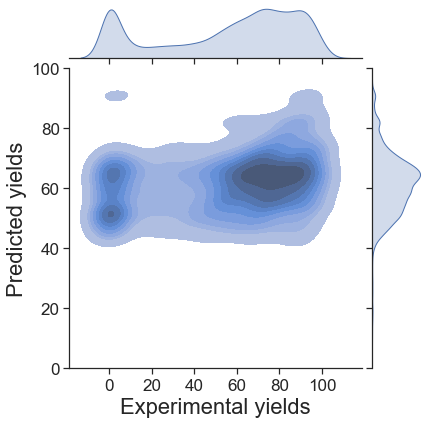

In [36]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_rxnfp_descriptors_full.png')

In [37]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

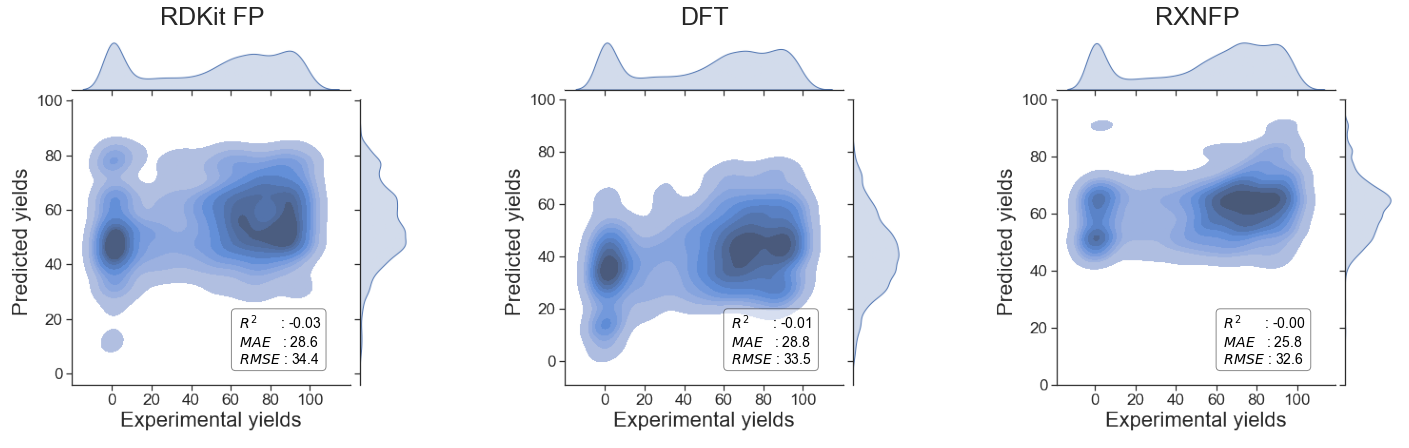

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 4. Mechanism split

In [39]:
df_1 = pd.read_csv('results/mechanisms_split_fp_descriptors')
df_2 = pd.read_csv('results/mechanisms_split_dft_descriptors')
df_3 = pd.read_csv('results/mechanisms_split_rxnfp_descriptors')

## FP descriptors

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


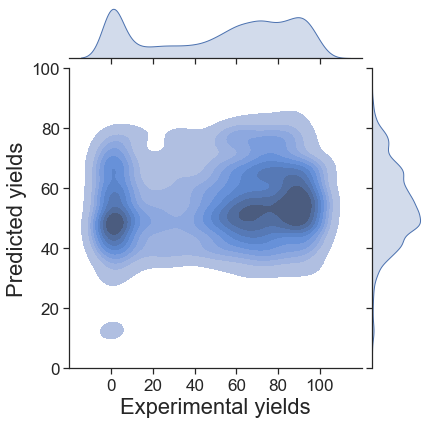

In [40]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_fp_descriptors_full.png')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

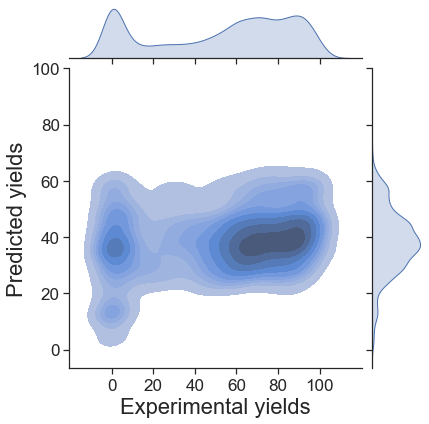

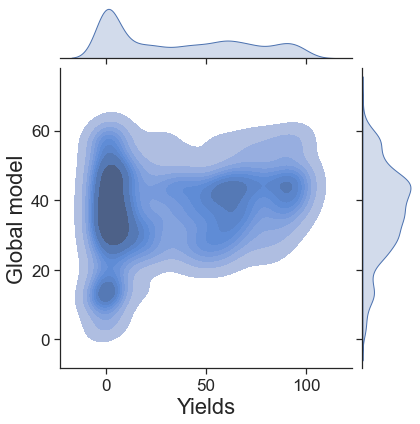

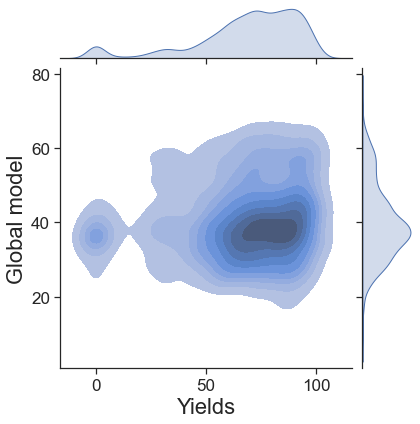

In [42]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_dft_descriptors_full.png')
fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_optimisation.png')
fig_paths.append('images/mechanism_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_scope.png')
fig_paths.append('images/mechanism_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

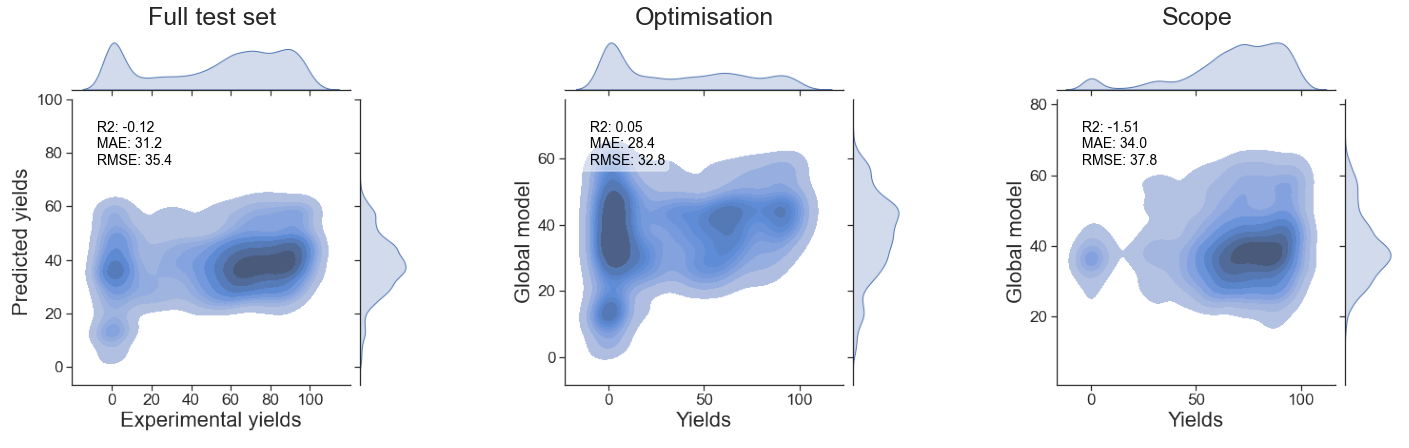

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


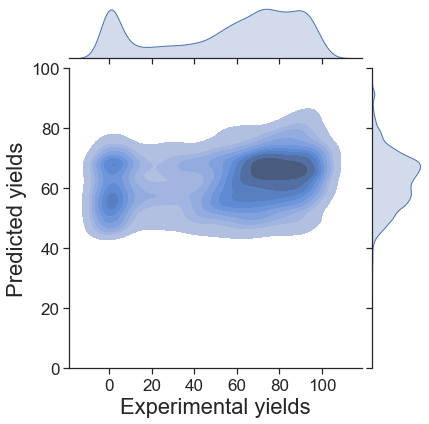

In [44]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_rxnfp_descriptors_full.png')

In [45]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

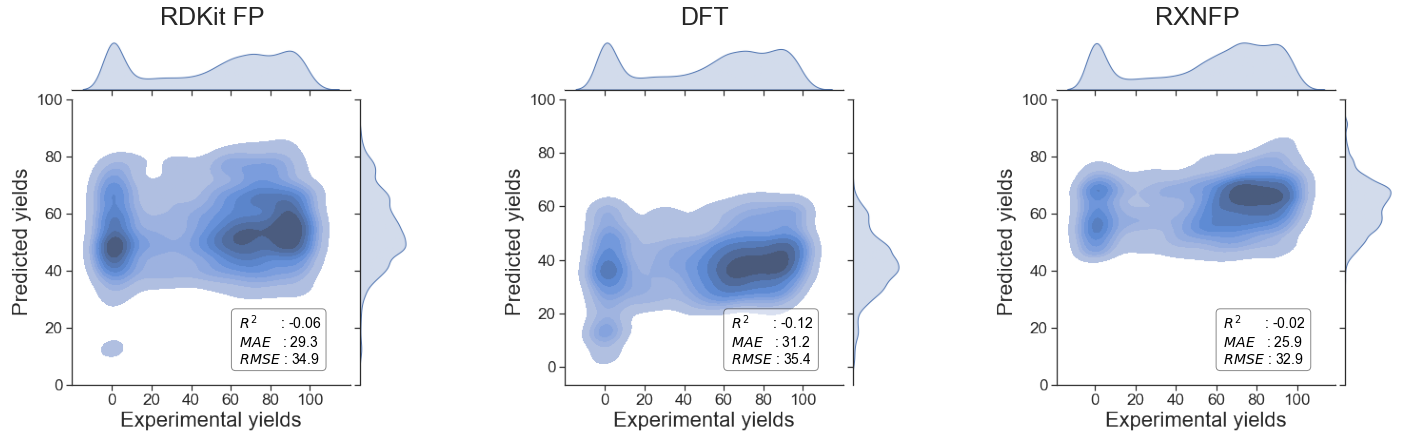

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 5. Training set size influence 

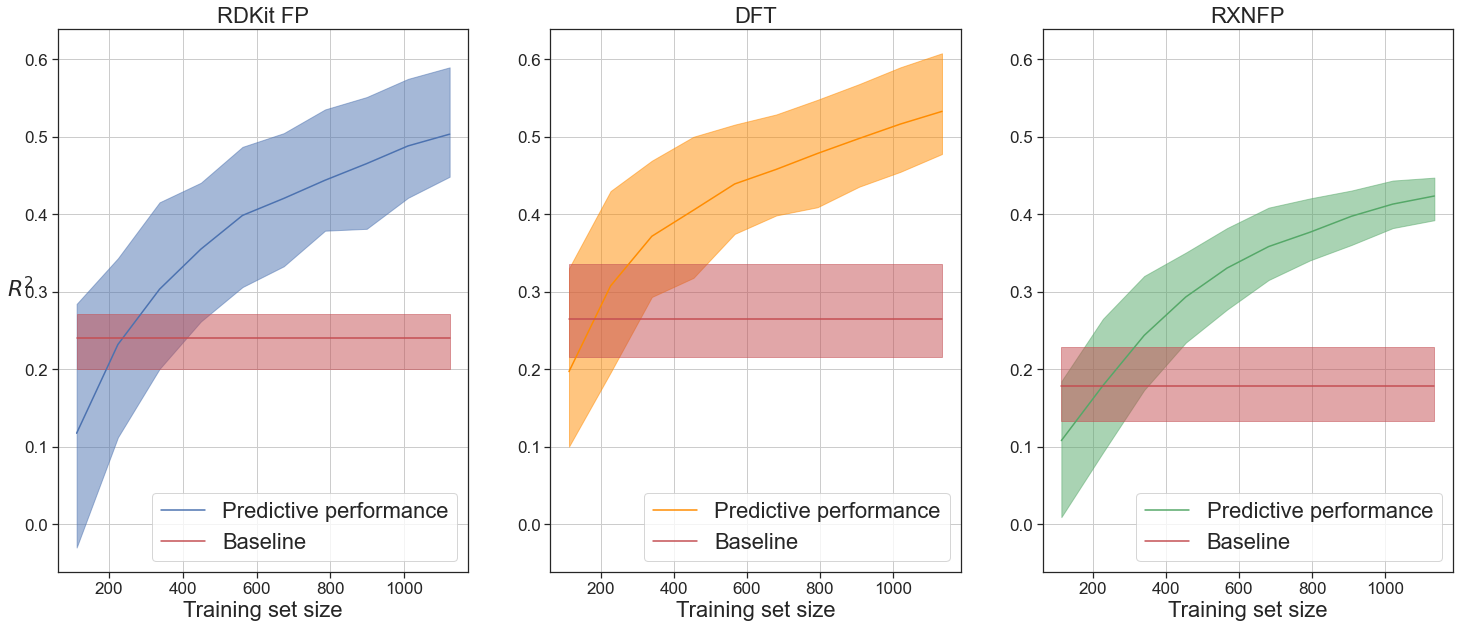

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)
df_1 = pd.read_csv('results/training_size_influence_fp_descriptors')
df_2 = pd.read_csv('results/training_size_influence_dft_descriptors')
df_3 = pd.read_csv('results/training_size_influence_rxnfp_descriptors')
dfs = [df_1, df_2, df_3]
origins = ["RDKit FP", "DFT", "RXNFP",]
colors = ['b', 'darkorange', 'g']
for i, origin in enumerate(origins):
    ax = axes[i]
    df = dfs[i]
    sizes = df["Sizes"]
    metric_mean = df["Metric mean"]
    metric_lower = df["Metric lower"]
    metric_upper = df["Metric upper"]
    baseline_mean = df["Baseline mean"]
    baseline_lower = df["Baseline lower"]
    baseline_upper = df["Baseline upper"]
    ax.set_title(origins[i], fontsize=22)
    ax.plot(sizes, metric_mean, color= colors[i], label='Predictive performance')
    ax.fill_between(sizes, metric_lower, metric_upper, color = colors[i], alpha=0.5)
    
    #plt.plot(sizes_o, metric_mean_o, label='Model predictions_scope/opt_info')
    #plt.fill_between(sizes_o, metric_lower_o, metric_upper_o, alpha=0.5)
     
    ax.plot(sizes, baseline_mean, c='r', label='Baseline')
    ax.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.legend(fontsize=22, loc=4)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    ax.set_xlabel("Training set size")
    if i==0:
        ax.set_ylabel("$R^2$", rotation=0)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.grid(True)
    
plt.show()

# 6. Restricted chemical space: Suzuki

In [48]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2_mechanism_suzuki')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2_mechanism_suzuki')

## FP descriptors

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


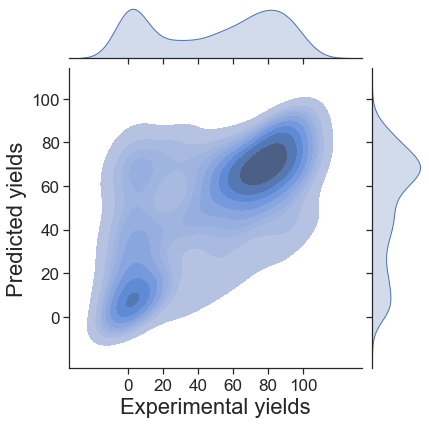

In [49]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_fp_descriptors_full_mechanism_suzuki.png')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

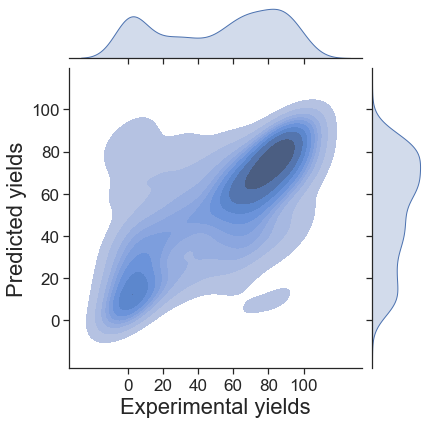

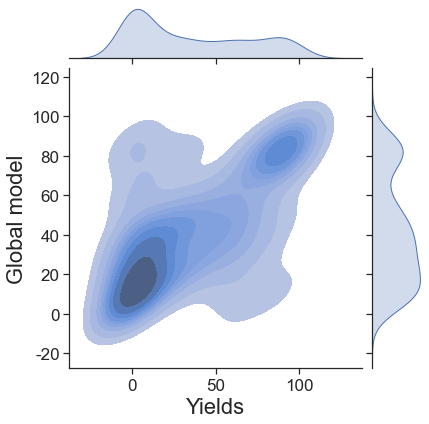

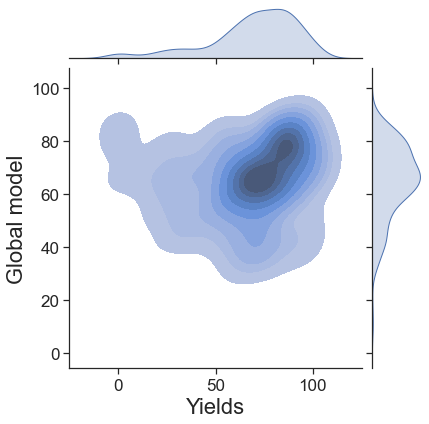

In [50]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png')

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))